# Mini-projet d’Optimisation – Master Data Science

Ce notebook présente la modélisation, la résolution et l’interprétation
de plusieurs problèmes d’optimisation linéaire et continue.

Les outils utilisés sont :
- la programmation linéaire
- le solveur GLPK via Pyomo
- la descente de gradient
- l’analyse des extrémums

Les exercices traités sont :
- Exercice 1 : Maximisation du bénéfice
- Exercice 2 : Plan de production hebdomadaire
- Exercice 3 : Descente de gradient
- Exercice 4 : Extrémums locaux et globaux


## Exercice 1 – Maximisation du bénéfice

Le club *Comptons Sur Nous de ITMA* fabrique des chaises, des bancs et des tables.
L’objectif est de déterminer le plan de production maximisant le bénéfice
sous contraintes de temps et de stock.


### Modélisation

Variables de décision :
- x : nombre de chaises produites
- y : nombre de bancs produits
- z : nombre de tables produites

Fonction objectif (bénéfice total) :
Maximiser :  
3000x + 3y + 5000z

Contraintes :
- Mise en forme : 1.2x + 1.7y + 1.2z ≤ 1000
- Soudure : 0.8x + 2.3z ≤ 1200
- Stock de tubes : 2x + 3y + 4.5z ≤ 2000

Variables positives :
x ≥ 0, y ≥ 0, z ≥ 0


In [5]:
from pyomo.environ import *

# Création du modèle
model = ConcreteModel()

# Variables
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)
model.z = Var(domain=NonNegativeReals)

# Fonction objectif
model.obj = Objective(
    expr=3000*model.x + 3*model.y + 5000*model.z,
    sense=maximize
)

# Contraintes
model.formage = Constraint(expr=1.2*model.x + 1.7*model.y + 1.2*model.z <= 1000)
model.soudure = Constraint(expr=0.8*model.x + 2.3*model.z <= 1200)
model.tubes = Constraint(expr=2*model.x + 3*model.y + 4.5*model.z <= 2000)

# Résolution
SolverFactory('glpk').solve(model)

# Résultats
print("Nombre de chaises :", model.x.value)
print("Nombre de bancs   :", model.y.value)
print("Nombre de tables  :", model.z.value)
print("Bénéfice maximum  :", model.obj())


Nombre de chaises : 700.0
Nombre de bancs   : 0.0
Nombre de tables  : 133.333333333333
Bénéfice maximum  : 2766666.666666665


Ces résultats montrent que le modèle privilégie la production de chaises
et de tables, qui génèrent les bénéfices les plus élevés par rapport
aux ressources consommées. À l’inverse, la production de bancs est nulle,
ce qui signifie que ce produit est moins rentable dans le contexte
des contraintes imposées (temps et stock de tubes).

## Exercice 2 – Plan de production hebdomadaire

La société Mali NEGUE fabrique deux types d’escaliers (A et B).
L’objectif est de maximiser le chiffre d’affaires hebdomadaire.


### Variables de décision

- x : nombre d’escaliers de type A
- y : nombre d’escaliers de type B

### Fonction objectif

Prix de vente :
- Escalier A : 1 500 000 F
- Escalier B : 1 000 000 F

Maximiser :
1 500 000x + 1 000 000y

### Contraintes de temps

- Namory : x + 2y ≤ 24
- Ibrahim : 2x + y ≤ 45
- Aïcha : x + 3y ≤ 30


In [6]:
model = ConcreteModel()

model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

model.obj = Objective(
    expr = 1500000*model.x + 1000000*model.y,
    sense = maximize
)

model.n = Constraint(expr = model.x + 2*model.y <= 24)
model.i = Constraint(expr = 2*model.x + model.y <= 45)
model.a = Constraint(expr = model.x + 3*model.y <= 30)

SolverFactory('glpk').solve(model)

print("Escalier A:",model.x.value)
print("Escalier B:",model.y.value)
print("Benefice maximum:",model.obj())

Escalier A: 22.0
Escalier B: 1.0
Benefice maximum: 34000000.0


Ce résultat indique que la production doit se concentrer principalement
sur les escaliers de type A, qui génèrent un chiffre d’affaires plus élevé
que les escaliers de type B. Le modèle ne supprime pas totalement la production
du type B, mais la limite à une quantité minimale compatible avec les contraintes
de temps de travail.


## Exercice 3 – Descente de gradient

On considère la fonction :
f(x, y) = (x − 2)² + 2(y − 3)²


La fonction est strictement convexe car sa hessienne est définie positive.
Elle admet donc un minimum global unique au point (2,3).


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x-2)**2 + 2*(y-3)**2

def grad(x, y):
    return np.array([2*(x-2), 4*(y-3)])

def gradient_descent(alpha, x0, y0, n_iter=30):
    x, y = x0, y0
    path = [(x, y)]
    for _ in range(n_iter):
        g = grad(x, y)
        x -= alpha * g[0]
        y -= alpha * g[1]
        path.append((x, y))
    return np.array(path)


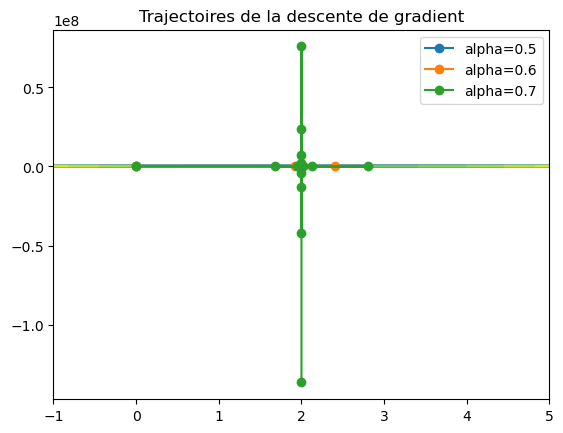

In [8]:
alphas = [0.5, 0.6, 0.7]
paths = {a: gradient_descent(a, 0, 0) for a in alphas}

X = np.linspace(-1, 5, 200)
Y = np.linspace(-1, 6, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20)
for a, p in paths.items():
    plt.plot(p[:,0], p[:,1], marker='o', label=f'alpha={a}')
plt.legend()
plt.title("Trajectoires de la descente de gradient")
plt.show()


La descente de gradient converge vers le minimum global.
Un pas trop élevé peut entraîner des oscillations ou une divergence.


## Exercice 4 – Extrémums locaux et globaux

On considère la fonction :
f(x, y) = 40 − x² − 3y²


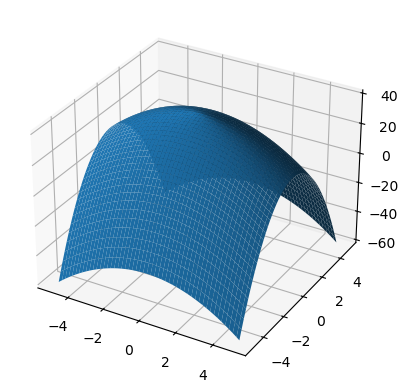

In [9]:
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = 40 - X**2 - 3*Y**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


Le gradient s’annule uniquement en (0,0).
La hessienne est définie négative, ce point est donc un maximum global.

La fonction ne possède aucun minimum car elle tend vers −∞.
